# Creating Actor Projections

### Dwayne Johnson Projection

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
import urllib
import scipy as sp
import math


In [2]:
dwayne_file = "autosaveDJO.graphml"

In [3]:
dwayne = nx.read_graphml(dwayne_file)
print(list(dwayne.nodes(data=True))[0:5])

[('100', {'label': '<Dwayne_Johnson>', 'bipartite': 0, '_depth': 0, '_expanded': 1, 'gender': 'male'}), ('101', {'label': '<Tooth_Fairy_(2010_film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 48000000.0, 'budget': 112500000.0}), ('102', {'label': '<Southland_Tales>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 17000000.0, 'budget': 374743.0}), ('103', {'label': '<Gridiron_Gang>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 30000000.0, 'budget': 179480851.0}), ('104', {'label': '<San_Andreas_(film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 110000000.0, 'budget': 474000000.0})]


In [4]:
actors = [node for node, nodedata in dwayne.nodes(data=True) if nodedata['bipartite'] == 0]

In [5]:
actorProjection = nx.bipartite.weighted_projected_graph(dwayne, actors)
filtered = nx.Graph(actorProjection)

to_remove = [(n1, n2) for n1,n2,data in actorProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)

labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#nx.draw(filtered2, labels = labels)

nx.write_graphml(filtered2, "DwayneJohnsonActors.graphml")



### Scarlett Johansson Projection

In [6]:
sjo_file = "autosaveSJO.graphml"

In [7]:
sjo = nx.read_graphml(sjo_file)

In [8]:
actors = [node for node, nodedata in sjo.nodes(data=True) if nodedata['bipartite'] == 0]

In [9]:
actorProjection = nx.bipartite.weighted_projected_graph(sjo, actors)
filtered = nx.Graph(actorProjection)

to_remove = [(n1, n2) for n1,n2,data in actorProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)

labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#nx.draw(filtered2, labels = labels)

nx.write_graphml(filtered2, "ScarletteJoActors.graphml")

# Creating Movie Projections

### Dwayne Johnson Movie Projection

In [10]:
dwayne_file = "autosaveDJO.graphml"

In [11]:
dwayne = nx.read_graphml(dwayne_file)

In [12]:
movies = [node for node, nodedata in dwayne.nodes(data=True) if nodedata['bipartite'] == 1]

In [13]:
movieProjection = nx.bipartite.weighted_projected_graph(dwayne, movies)
filtered = nx.Graph(movieProjection)

to_remove = [(n1, n2) for n1,n2,data in movieProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)
labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#remove 0 budget



In [14]:
filtered3 = filtered2.copy()

print(len(filtered2.nodes(data=True)))
NanMovies = [n1 for n1, data in filtered2.nodes(data=True) if np.isnan(data['gross']) or np.isnan(data['budget'])]
#len(NanMovies)

filtered3.remove_nodes_from(NanMovies)


296


In [15]:
print(len(filtered2 ) == len(filtered3))

False


In [16]:
movies = [(node,nodedata) for node, nodedata in filtered3.nodes(data=True) if nodedata['bipartite'] == 1]


In [17]:
names = {movie:data['label'] for movie, data in movies}

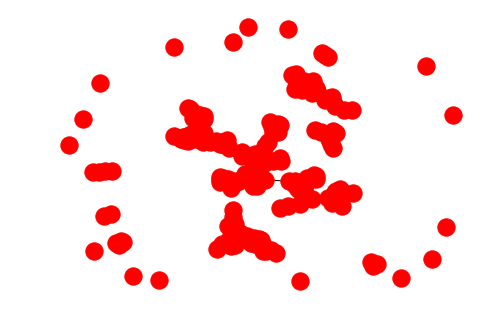

In [18]:
nx.set_node_attributes(filtered3, names, name = "Names")


nx.draw(filtered3)

nx.write_graphml(filtered3, "DwayneJohnsonMOVIESFiltered.graphml")


### Scarlett Johansson Projection

In [19]:
SJO = nx.read_graphml(sjo_file)
#print(list(SJO.nodes(data=True))[0:5])

In [20]:
movies = [node for node, nodedata in SJO.nodes(data=True) if nodedata['bipartite'] == 1]

In [21]:
movieProjection = nx.bipartite.weighted_projected_graph(SJO, movies)
filtered = nx.Graph(movieProjection)

to_remove = [(n1, n2) for n1,n2,data in movieProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)
labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#remove 0 budget



In [22]:
filtered3 = filtered2.copy()

print(len(filtered2.nodes(data=True)))
NanMovies = [n1 for n1, data in filtered2.nodes(data=True) if np.isnan(data['gross']) or np.isnan(data['budget'])]
#len(NanMovies)

filtered3.remove_nodes_from(NanMovies)


341


In [23]:
print(len(filtered2 ) == len(filtered3))

False


In [24]:
movies = [(node,nodedata) for node, nodedata in filtered3.nodes(data=True) if nodedata['bipartite'] == 1]


In [25]:
names = {movie:data['label'] for movie, data in movies}

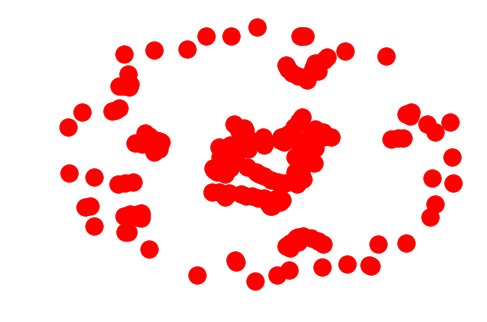

In [26]:
nx.set_node_attributes(filtered3, names, name = "Names")


nx.draw(filtered3)

nx.write_graphml(filtered3, "ScarlettJMOVIESFiltered.graphml")


# Combining Movie Projections for analysis:

In [27]:
dwayne_file = "DwayneJohnsonMOVIESFiltered.graphml"
sjo_file = "ScarlettJMOVIESFiltered.graphml"

In [28]:
SJO = nx.read_graphml(sjo_file)
dwayne = nx.read_graphml(dwayne_file)

In [29]:
nx.set_node_attributes(SJO, "SJO", name="side")
nx.set_node_attributes(dwayne, "DJO", name="side")

In [30]:
combined = nx.compose(dwayne,SJO)

In [31]:
nx.write_graphml(combined, "combinedMOVIESFiltered.graphml")

# Gender Comparison

### Dwayne Johnson Gender Comparison

In [32]:
dwayne_file = "DwayneJohnsonActors.graphml"

In [33]:
dwayne = nx.read_graphml(dwayne_file)
dwayneDict = dwayne.nodes(data=True)

In [34]:
dwayne_deg = dict(nx.degree(dwayne, weight="weight"))
dwayne_bet = dict(nx.betweenness_centrality(dwayne, weight="weight"))
dwayne_clo = dict(nx.closeness_centrality(dwayne))

In [35]:
names = {actor:data['label'] for actor, data in dwayneDict}
gender ={actor:data['gender'] for actor, data in dwayneDict}

In [36]:
dwayne_df = pd.DataFrame({"Wt Degree": dwayne_deg, "bet":dwayne_bet, "clo":dwayne_clo, "Names": names, "Sex": gender})
dwayne_df = dwayne_df.set_index("Names")
dwayne_df.head()

,Wt Degree,bet,clo,Sex
Names,,,,
<Dwayne_Johnson>,41,0.042909,0.264034,male
<Ashley_Judd>,21,0.020275,0.239298,female
<Julie_Andrews>,60,0.041406,0.237217,female
<Wallace_Shawn>,54,0.064670,0.252686,male
<Miranda_Richardson>,44,0.046704,0.276225,female


In [37]:
dw_bool = dwayne_df['Sex'] == 'male' 
dw_filter = dwayne_df['bet'] != 0

nonZeroBet = dwayne_df['bet'][dw_filter]
nonZeroClo = dwayne_df['clo'][dw_filter]

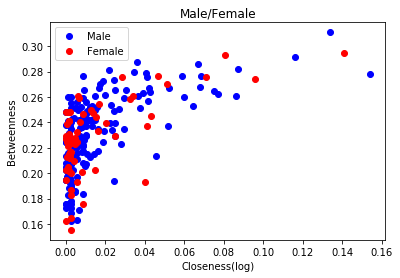

In [38]:
nonZeroBet = dwayne_df['bet'][dw_filter]

dwayne_betm = nonZeroBet[dw_bool]
dwayne_clom = nonZeroClo[dw_bool]
plt.plot( dwayne_betm, dwayne_clom, 'ob')

dwayne_betf = nonZeroBet[~dw_bool]
dwayne_clof = nonZeroClo[~dw_bool]
plt.plot( dwayne_betf, dwayne_clof,  'or')

plt.title('Male/Female')
plt.ylabel('Betweenness')
plt.xlabel('Closeness(log)')
plt.legend(['Male', 'Female'])

In [39]:
type(dwayne_df['Sex'])
males = dwayne_df['Sex'][dw_bool]
len(males)
females = dwayne_df['Sex'][~dw_bool]
len(females)

226

Text(0.5,1,'Closeness in Males vs Females in DJO graph')

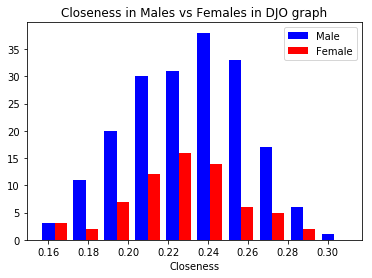

In [40]:

plt.hist([dwayne_clom, dwayne_clof]  , color = ['b', 'r'])

plt.xlabel("Closeness")
plt.legend(["Male","Female"])
plt.title("Closeness in Males vs Females in DJO graph")

([array([  0.,   4.,  18.,  34.,  86., 108.,  14.,   3.,   0.]),
  array([ 0.,  1., 14., 15., 46., 69.,  9.,  5.,  0.])],
 array([0.1       , 0.12222222, 0.14444444, 0.16666667, 0.18888889,
        0.21111111, 0.23333333, 0.25555556, 0.27777778, 0.3       ]),
 <a list of 2 Lists of Patches objects>)

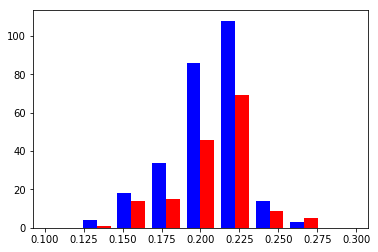

In [41]:
onlyZeroClo = dwayne_df['clo'][~dw_filter]

femaleClo = onlyZeroClo[dw_bool]
maleClo = onlyZeroClo[~dw_bool]
bins = np.linspace(0.1, 0.3, 10)
plt.hist([femaleClo, maleClo] , bins , color = ['b', 'r'])
#plt.hist(maleClo , bins,  alpha = 0.5, color = 'r')

([array([  9.,  20.,  41.,  79., 129.,  92.,  51.,  24.,  11.,   1.]),
  array([ 3., 18., 15., 37., 72., 51., 19.,  8.,  2.,  1.])],
 array([0.13451677, 0.15216404, 0.16981131, 0.18745859, 0.20510586,
        0.22275314, 0.24040041, 0.25804769, 0.27569496, 0.29334224,
        0.31098951]),
 <a list of 2 Lists of Patches objects>)

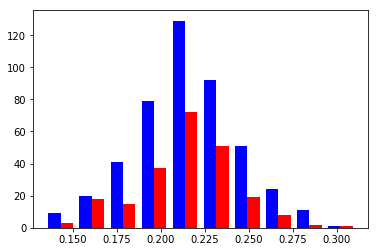

In [42]:

maleClo = dwayne_df['clo'][dw_bool]
femaleClo = dwayne_df['clo'][~dw_bool]
plt.hist([maleClo, femaleClo] , color = ['b', 'r'])

Text(0.5,1,'Male/Female Weighted Degree')

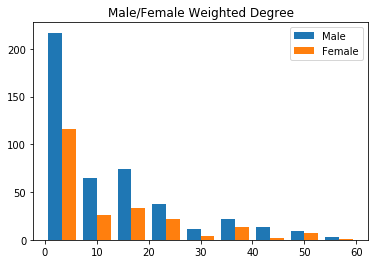

In [43]:

bins = np.linspace(0, 60,10)
plt.hist([dwayne_df['Wt Degree'][dw_bool], dwayne_df['Wt Degree'][~dw_bool]], bins)
plt.legend(["Male", "Female"])
plt.title("Male/Female Weighted Degree")
#plt.axes(y = 'log')

Text(0.5,1,'Betweenness in Males vs Females in DJO graph')

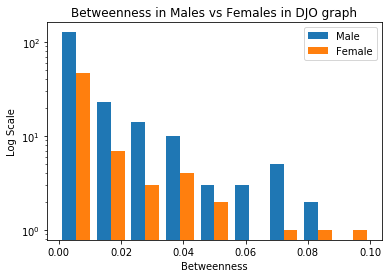

In [44]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
plt.ylabel("Log Scale")
plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Betweenness in Males vs Females in DJO graph")

Text(0.5,1,'Not Log')

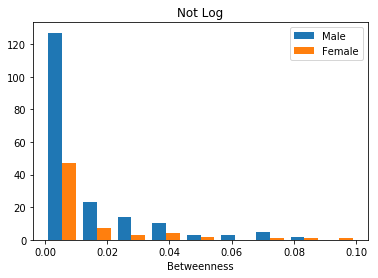

In [45]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
#plt.ylabel("Log Scale")
#plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Not Log")

### Scarlett Johansson Gender Comparison

In [46]:
dwayne_file = "ScarletteJoActors.graphml"

In [47]:
dwayne = nx.read_graphml(dwayne_file)
dwayneDict = dwayne.nodes(data=True)

In [48]:
dwayne_deg = dict(nx.degree(dwayne, weight="weight"))
dwayne_bet = dict(nx.betweenness_centrality(dwayne, weight="weight"))
dwayne_clo = dict(nx.closeness_centrality(dwayne))

In [49]:
names = {actor:data['label'] for actor, data in dwayneDict}
gender ={actor:data['gender'] for actor, data in dwayneDict}

In [50]:
dwayne_df = pd.DataFrame({"Wt Degree": dwayne_deg, "bet":dwayne_bet, "clo":dwayne_clo, "Names": names, "Sex": gender})
dwayne_df = dwayne_df.set_index("Names")
dwayne_df.head()

,Wt Degree,bet,clo,Sex
Names,,,,
<Scarlett_Johansson>,56,0.071382,0.390625,male
<Sam_Neill>,76,0.099540,0.322252,male
<Robert_Redford>,24,0.034070,0.232047,male
<Kristin_Scott_Thomas>,25,0.038956,0.316667,female
<Chris_Evans_(actor)>,60,0.025121,0.359033,male


In [51]:
dw_bool = dwayne_df['Sex'] == 'male' 
dw_filter = dwayne_df['bet'] != 0


nonZeroBet = dwayne_df['bet'][dw_filter]
nonZeroClo = dwayne_df['clo'][dw_filter]


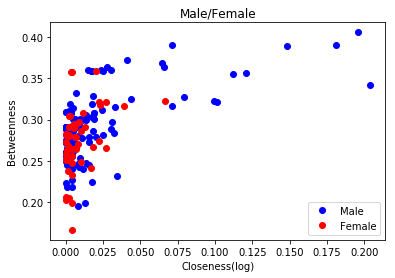

In [52]:
nonZeroBet = dwayne_df['bet'][dw_filter]

dwayne_betm = nonZeroBet[dw_bool]
dwayne_clom = nonZeroClo[dw_bool]
plt.plot( dwayne_betm, dwayne_clom, 'ob')

dwayne_betf = nonZeroBet[~dw_bool]
dwayne_clof = nonZeroClo[~dw_bool]
plt.plot( dwayne_betf, dwayne_clof,  'or')


plt.title('Male/Female')
plt.ylabel('Betweenness')
plt.xlabel('Closeness(log)')
plt.legend(['Male', 'Female'])

In [53]:
type(dwayne_df['Sex'])
males = dwayne_df['Sex'][dw_bool]
len(males)
females = dwayne_df['Sex'][~dw_bool]
len(females)

159

Text(0.5,1,'Closeness in Males vs Females in SJO graph')

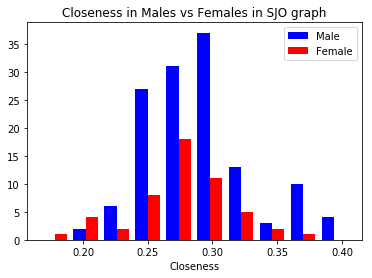

In [54]:

plt.hist([dwayne_clom, dwayne_clof]  , color = ['b', 'r'])
#plt.hist(dwayne_betm , bins , alpha = 0.5, color = 'b')
#plt.hist(dwayne_betf , bins,  alpha = 0.5, color = 'r')
plt.xlabel("Closeness")
plt.legend(["Male","Female"])
plt.title("Closeness in Males vs Females in SJO graph")

([array([ 0.,  0.,  3.,  7., 16., 17., 66., 42., 33.]),
  array([ 0.,  1.,  1.,  7., 10.,  8., 28., 28., 17.])],
 array([0.1       , 0.12222222, 0.14444444, 0.16666667, 0.18888889,
        0.21111111, 0.23333333, 0.25555556, 0.27777778, 0.3       ]),
 <a list of 2 Lists of Patches objects>)

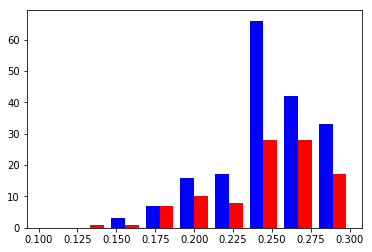

In [55]:
onlyZeroClo = dwayne_df['clo'][~dw_filter]

femaleClo = onlyZeroClo[dw_bool]
maleClo = onlyZeroClo[~dw_bool]
bins = np.linspace(0.1, 0.3, 10)
plt.hist([femaleClo, maleClo] , bins , color = ['b', 'r'])
#plt.hist(maleClo , bins,  alpha = 0.5, color = 'r')

([array([ 3., 13., 23., 65., 98., 71., 25.,  3., 12.,  4.]),
  array([ 3.,  7., 18., 25., 57., 31., 15.,  0.,  3.,  0.])],
 array([0.14247151, 0.16882265, 0.19517379, 0.22152493, 0.24787607,
        0.27422721, 0.30057835, 0.32692949, 0.35328063, 0.37963177,
        0.40598291]),
 <a list of 2 Lists of Patches objects>)

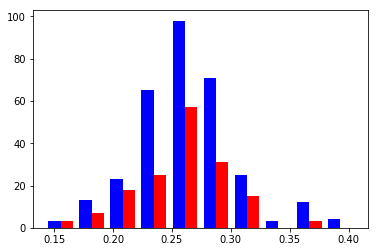

In [56]:

maleClo = dwayne_df['clo'][dw_bool]
femaleClo = dwayne_df['clo'][~dw_bool]
plt.hist([maleClo, femaleClo] , color = ['b', 'r'])

Text(0.5,1,'Male/Female Weighted Degree')

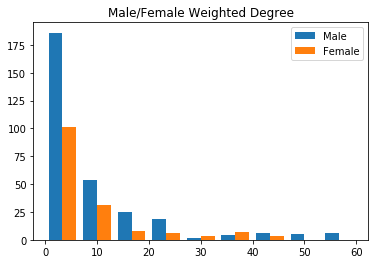

In [57]:
bins = np.linspace(0, 60,10)
plt.hist([dwayne_df['Wt Degree'][dw_bool], dwayne_df['Wt Degree'][~dw_bool]], bins)
plt.legend(["Male", "Female"])
plt.title("Male/Female Weighted Degree")
#plt.axes(y = 'log')

Text(0.5,1,'Betweenness in Males vs Females in SJO graph')

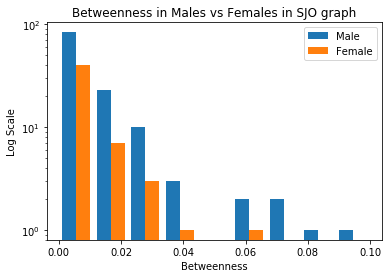

In [58]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
plt.ylabel("Log Scale")
plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Betweenness in Males vs Females in SJO graph")

# Profit Ratio Heatmap Comparison

### Dwayne Profit Heatmap

In [59]:
dwayne_file = "autosaveDJO.graphml"

In [60]:
dwayne = nx.read_graphml(dwayne_file)

In [61]:
movies = [node for node, node_data in dwayne.nodes(data=True) if node_data['bipartite'] == 1]

In [62]:
movieProjection = nx.bipartite.weighted_projected_graph(dwayne,movies)
filtered = nx.Graph(movieProjection)
len(filtered)

2683

In [63]:
to_remove = []
for node, data in filtered.nodes(data=True):  
    if(math.isnan(data['gross']) or math.isnan(data['budget'])):
        to_remove.append(node)

In [64]:
for item in to_remove:
    filtered.remove_node(item)


In [65]:
len(filtered.nodes(data=True))
dwayne_gross = dict(nx.get_node_attributes(filtered, "gross"))
dwayne_budget = dict(nx.get_node_attributes(filtered, "budget"))
dwayne_names = dict(nx.get_node_attributes(filtered,"label"))

In [66]:
df = pd.DataFrame({"Name":dwayne_names, "Gross": dwayne_gross, "Budget":dwayne_budget})


Text(0.5,1,'Log-log budget v ratio in DJO movies')

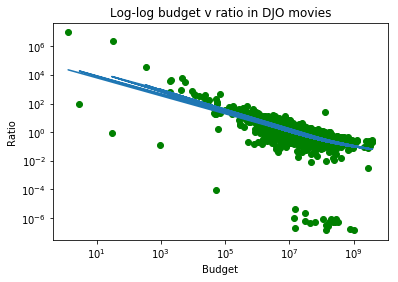

In [67]:
GB = df['Gross']/df['Budget']
df['ratio'] = GB
df.head()

b = df['Budget']
r = df['ratio']

plt.loglog(df['Budget'],df['ratio'], 'og')
#plt.ylim(0,30)
plt.ylabel('Ratio')
plt.xlabel('Budget')

logx = np.log(b)
logy = np.log(r)
coeffs = np.polyfit(logx, logy, deg=3)
poly = np.poly1d(coeffs)
yfit = lambda x:np.exp(poly(np.log(x)))
plt.loglog(b,yfit(b))
plt.title("Log-log budget v ratio in DJO movies")

In [68]:
max(df['ratio'])

9230769.23076923

Text(0.5,1,'Profit Ratio Heatmap of DJO')

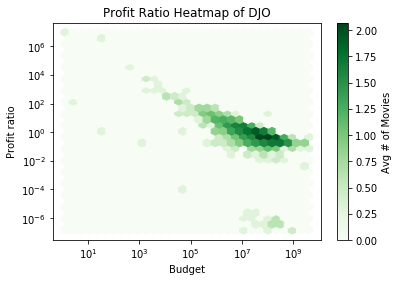

In [69]:
from matplotlib import cm as CM

plt.hexbin(df['Budget'],df['ratio'], bins = 'log', yscale= 'log', xscale = 'log', cmap=CM.Greens, gridsize = 30)
#plt.axis([df['Budget'].min(),df['Budget'].max(),df['ratio'].min(),df['ratio'].max() ])
cb = plt.colorbar()
cb.set_label("Avg # of Movies")
plt.ylabel('Profit ratio')
plt.xlabel('Budget')
plt.title("Profit Ratio Heatmap of DJO")



### Scarlett Profit ratio heatmap

In [70]:
scarlett_file = "autosaveSJO.graphml"

In [71]:
scarlett = nx.read_graphml(scarlett_file)

In [72]:
movies = [node for node, node_data in scarlett.nodes(data=True) if node_data['bipartite'] == 1]

In [73]:
movieProjection = nx.bipartite.weighted_projected_graph(scarlett,movies)
filtered = nx.Graph(movieProjection)
len(filtered)

3179

In [74]:
to_remove = []
for node, data in filtered.nodes(data=True):  
    if(math.isnan(data['gross']) or math.isnan(data['budget'])):
        to_remove.append(node)

In [75]:
for item in to_remove:
    filtered.remove_node(item)

In [76]:
len(filtered.nodes(data=True))
scarlett_gross = dict(nx.get_node_attributes(filtered, "gross"))
scarlett_budget = dict(nx.get_node_attributes(filtered, "budget"))
scarlett_names = dict(nx.get_node_attributes(filtered,"label"))

In [77]:
df = pd.DataFrame({"Name":scarlett_names, "Gross": scarlett_gross, "Budget":scarlett_budget})


Text(0.5,1,'Log-log budget v ratio in SJO movies')

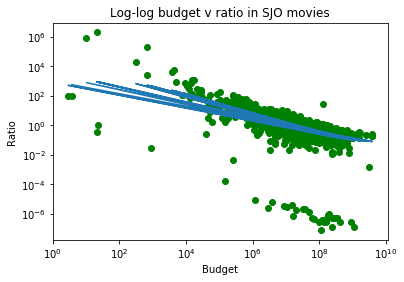

In [78]:
GB = df['Gross']/df['Budget']
df['ratio'] = GB
df.head()

b = df['Budget']
r = df['ratio']

plt.loglog(df['Budget'],df['ratio'], 'og')
#plt.ylim(0,30)
plt.ylabel('Ratio')
plt.xlabel('Budget')

logx = np.log(b)
logy = np.log(r)
coeffs = np.polyfit(logx, logy, deg=3)
poly = np.poly1d(coeffs)
yfit = lambda x:np.exp(poly(np.log(x)))
plt.loglog(b,yfit(b))
plt.title("Log-log budget v ratio in SJO movies")

In [79]:
max(df['ratio'])

1932367.1497584542

In [80]:
plt.close()

Text(0.5,0,'Budget')

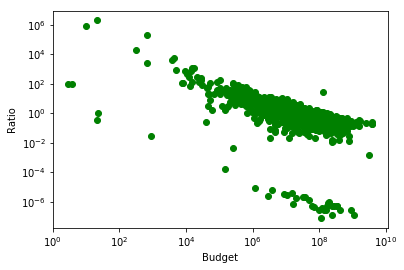

In [81]:
GB = df['Gross']/df['Budget']
df['ratio'] = GB
df.head()

b = df['Budget']
r = df['ratio']

plt.loglog(df['Budget'],df['ratio'], 'og')
#plt.ylim(0,30)
plt.ylabel('Ratio')
plt.xlabel('Budget')



Text(0.5,1,'Profit Ratio Heatmap of SJO')

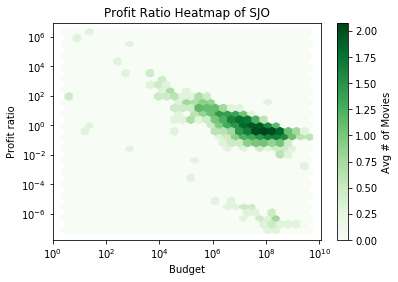

In [82]:
from matplotlib import cm as CM

plt.hexbin(df['Budget'],df['ratio'], bins = 'log', yscale= 'log', xscale = 'log', cmap=CM.Greens, gridsize = 30)
#plt.axis([df['Budget'].min(),df['Budget'].max(),df['ratio'].min(),df['ratio'].max() ])
cb = plt.colorbar()
cb.set_label("Avg # of Movies")
plt.ylabel('Profit ratio')
plt.xlabel('Budget')
plt.title("Profit Ratio Heatmap of SJO")



# Correlation Comparison

In [83]:
dwayne_file = "DwayneJohnsonActors.graphml"

In [84]:
dwayne = nx.read_graphml(dwayne_file)

In [85]:
dwayne_deg = dict(nx.degree(dwayne, weight="weight"))

In [86]:
dwayne_bet = dict(nx.betweenness_centrality(dwayne, weight="weight"))

In [87]:
dwayne_clo = dict(nx.closeness_centrality(dwayne))

In [88]:
names = nx.get_node_attributes(dwayne, "label")

In [89]:
dwayne_df = pd.DataFrame({"Wt Degree": dwayne_deg, "Betweenness":dwayne_bet, "Closeness":dwayne_clo, "Names": names})
dwayne_df = dwayne_df.set_index("Names")
dwayne_df.head()

,Wt Degree,Betweenness,Closeness
Names,,,
<Dwayne_Johnson>,41,0.042909,0.264034
<Ashley_Judd>,21,0.020275,0.239298
<Julie_Andrews>,60,0.041406,0.237217
<Wallace_Shawn>,54,0.064670,0.252686
<Miranda_Richardson>,44,0.046704,0.276225


In [90]:
scarlett_file = "ScarletteJoActors.graphml"

In [91]:
scarlett = nx.read_graphml(scarlett_file)

In [92]:
scar_deg = dict(nx.degree(scarlett, weight="weight"))

In [93]:
scar_bet = dict(nx.betweenness_centrality(scarlett, weight="weight"))

In [94]:
scar_clo = dict(nx.closeness_centrality(scarlett))

In [95]:
names2 = nx.get_node_attributes(scarlett, "label")

In [96]:
scar_df = pd.DataFrame({"Wt Degree": scar_deg, "Betweenness":scar_bet, "Closeness":scar_clo, "Names": names2})
scar_df = scar_df.set_index("Names")
scar_df.head()

,Wt Degree,Betweenness,Closeness
Names,,,
<Scarlett_Johansson>,56,0.071382,0.390625
<Sam_Neill>,76,0.099540,0.322252
<Robert_Redford>,24,0.034070,0.232047
<Kristin_Scott_Thomas>,25,0.038956,0.316667
<Chris_Evans_(actor)>,60,0.025121,0.359033


In [97]:
scar_df.describe()

,Wt Degree,Betweenness,Closeness
count,476.000000,476.000000,476.000000
mean,10.924370,0.006321,0.262667
std,17.027982,0.021485,0.039434
min,2.000000,0.000000,0.142472
25%,2.000000,0.000000,0.243653
50%,4.000000,0.000000,0.262867
75%,12.000000,0.003639,0.282402
max,153.000000,0.203777,0.405983


In [98]:
dwayne_df.describe()

,Wt Degree,Betweenness,Closeness
count,683.000000,683.000000,683.000000
mean,13.045388,0.005696,0.214796
std,14.781775,0.016389,0.028467
min,2.000000,0.000000,0.134517
25%,2.000000,0.000000,0.197338
50%,7.000000,0.000000,0.216096
75%,18.000000,0.002933,0.229205
max,119.000000,0.154023,0.310990


Text(0.5,0.98,'Dwayne Johnson Correlation')

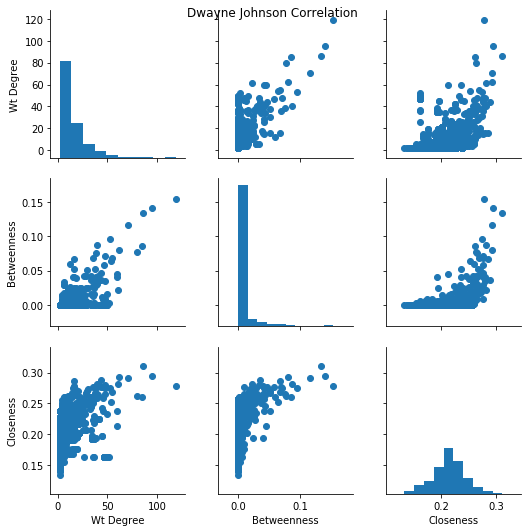

In [122]:
g = sbn.PairGrid(dwayne_df)
g.map_upper(plt.scatter)
g.map_diag(plt.hist)
g.map_lower(plt.scatter)


g.fig.suptitle("Dwayne Johnson Correlation")

In [100]:
centralities = ['Wt Degree', 'Betweenness', 'Closeness']

top_dwayne = [dwayne_df[centrality].sort_values(ascending=False).index[0] for centrality in centralities]
top_dwayne

['<Michael_Caine>', '<Michael_Caine>', '<Harvey_Keitel>']

Text(0.5,0.98,'Scarlett Johansson Correlation')

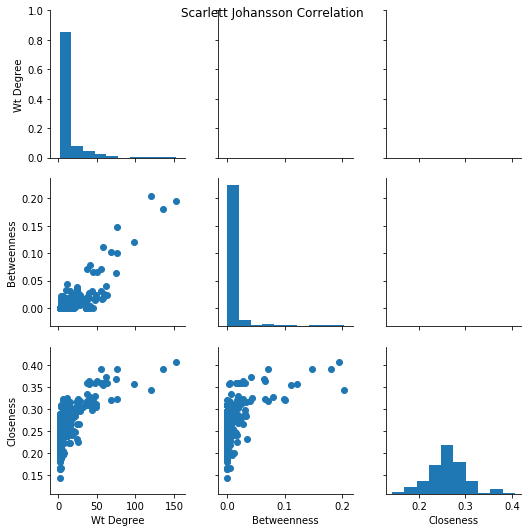

In [117]:
g2 = sbn.PairGrid(scar_df)
#g2.map_offdiag(plt.hexbin)
g2.map_diag(plt.hist)
g2.map_lower(plt.scatter)
g2.map_upper
g2.fig.suptitle("Scarlett Johansson Correlation")

In [102]:
dwayne_corr = dwayne_df.corr()
dwayne_corr

,Wt Degree,Betweenness,Closeness
Wt Degree,1.000000,0.633914,0.380429
Betweenness,0.633914,1.000000,0.521715
Closeness,0.380429,0.521715,1.000000


In [103]:
scar_corr = scar_df.corr()
scar_corr

,Wt Degree,Betweenness,Closeness
Wt Degree,1.000000,0.830302,0.667208
Betweenness,0.830302,1.000000,0.503810
Closeness,0.667208,0.503810,1.000000
